In [ ]:
#all the imports
import json
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read path and filenames from json
with open('private.json', 'r') as fp:
    data = json.load(fp)
    
#
path = data["path"]
clean_csv = data["clean-csv"]

In [ ]:
#read the clean data
flies = pd.read_csv(path + clean_csv, index_col = 0)

In [ ]:
#flies.shape
flies.head()

,conditioning,Aggregation,Chain,Chase,Grooming,Interaction,Song,Stop,Touch,Turn,...,dell2nose,dnose2ell,dnose2tail,dphi,magveldiff_anglesub,magveldiff_nose2ell,nflies_close,velmag,veltoward_anglesub,veltoward_nose2ell
0,Males_Grouped_and_Female,0.164939,0.003074,0.002740,0.623537,0.029996,0.000148,0.928233,0.032032,0.155644,...,17.365786,17.341250,17.931129,0.058062,0.312621,0.218036,0.088728,1.041968,0.019937,0.004199
1,Males_Grouped_and_Female,0.048067,0.007814,0.006962,0.275107,0.050104,0.000296,0.417827,0.046845,0.313694,...,20.178487,20.353836,21.238174,0.563186,0.535738,0.539784,0.123796,10.130153,0.181126,0.004488
2,Males_Grouped_and_Female,0.109465,0.005962,0.002963,0.727448,0.040327,0.000259,0.791920,0.025478,0.211598,...,17.905987,17.964035,18.668223,-0.271579,0.374441,0.296263,0.080951,3.653590,0.058584,-0.008376
3,Males_Grouped_and_Female,0.120019,0.015109,0.019997,0.498037,0.066916,0.000518,0.595134,0.069693,0.253296,...,16.750151,16.666581,17.350089,0.331163,0.421579,0.393482,0.157347,6.955505,0.136966,0.022491
4,Males_Grouped_and_Female,0.045512,0.008073,0.011221,0.277218,0.053140,0.001074,0.435417,0.047882,0.314916,...,18.920606,19.079594,19.947508,-0.069471,0.522098,0.526454,0.118353,10.308028,0.206243,0.003831


In [ ]:
#z-score to all but "conditioning"
behaviors_feature_names = flies.columns.to_list() 
behaviors_feature_names.remove('conditioning')

for i in behaviors_feature_names:
  flies[i] = stats.zscore(flies[i])

In [ ]:
flies.describe()

,Aggregation,Chain,Chase,Grooming,Interaction,Song,Stop,Touch,Turn,Walk,...,dell2nose,dnose2ell,dnose2tail,dphi,magveldiff_anglesub,magveldiff_nose2ell,nflies_close,velmag,veltoward_anglesub,veltoward_nose2ell
count,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,...,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03
mean,2.843593e-17,7.819880e-17,-9.952575e-17,0.000000,-1.421796e-16,2.132695e-17,4.549748e-16,-1.848335e-16,1.706156e-16,3.412311e-16,...,4.052120e-16,-2.914683e-16,-1.208527e-16,2.665868e-17,8.530778e-17,3.127952e-16,8.530778e-17,-1.421796e-16,-5.687185e-17,7.108982e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-9.350835e-01,-9.365888e-01,-8.402066e-01,-2.714453,-1.910569e+00,-8.709224e-01,-2.710135e+00,-1.296576e+00,-4.632700e+00,-2.685854e+00,...,-3.098312e+00,-3.214166e+00,-3.263028e+00,-5.367651e+00,-2.451553e+00,-2.297640e+00,-1.072156e+00,-1.956553e+00,-1.780584e+00,-3.516467e+00
25%,-6.887000e-01,-6.684889e-01,-5.425928e-01,-0.764361,-6.557609e-01,-5.408011e-01,-7.352752e-01,-6.351117e-01,-6.902412e-01,-7.240914e-01,...,-4.883246e-01,-4.992683e-01,-5.013913e-01,-6.185816e-01,-6.379066e-01,-6.705698e-01,-5.981432e-01,-6.892887e-01,-7.047472e-01,-4.820123e-01
50%,-3.919293e-01,-3.651305e-01,-2.829695e-01,0.014026,-2.225535e-01,-2.582871e-01,3.646360e-03,-2.989744e-01,-1.370613e-02,4.817448e-02,...,8.389003e-02,8.217083e-02,8.483736e-02,4.480464e-04,-2.847564e-02,-2.709459e-02,-3.395962e-01,-1.100797e-01,-1.124588e-01,-1.933048e-01
75%,3.355335e-01,2.864521e-01,1.410099e-01,0.762076,4.507181e-01,2.125695e-01,7.144629e-01,3.045472e-01,7.031729e-01,7.517603e-01,...,6.178580e-01,6.126611e-01,6.151207e-01,6.323912e-01,6.704369e-01,6.827622e-01,1.584394e-01,5.853634e-01,5.925267e-01,2.736246e-01
max,4.474692e+00,5.972820e+00,1.217192e+01,2.649101,8.868241e+00,2.093026e+01,2.315430e+00,6.337944e+00,3.119092e+00,3.564707e+00,...,7.695658e+00,7.641268e+00,7.551688e+00,5.763123e+00,3.081145e+00,2.808354e+00,5.858370e+00,3.738063e+00,3.965289e+00,1.273452e+01


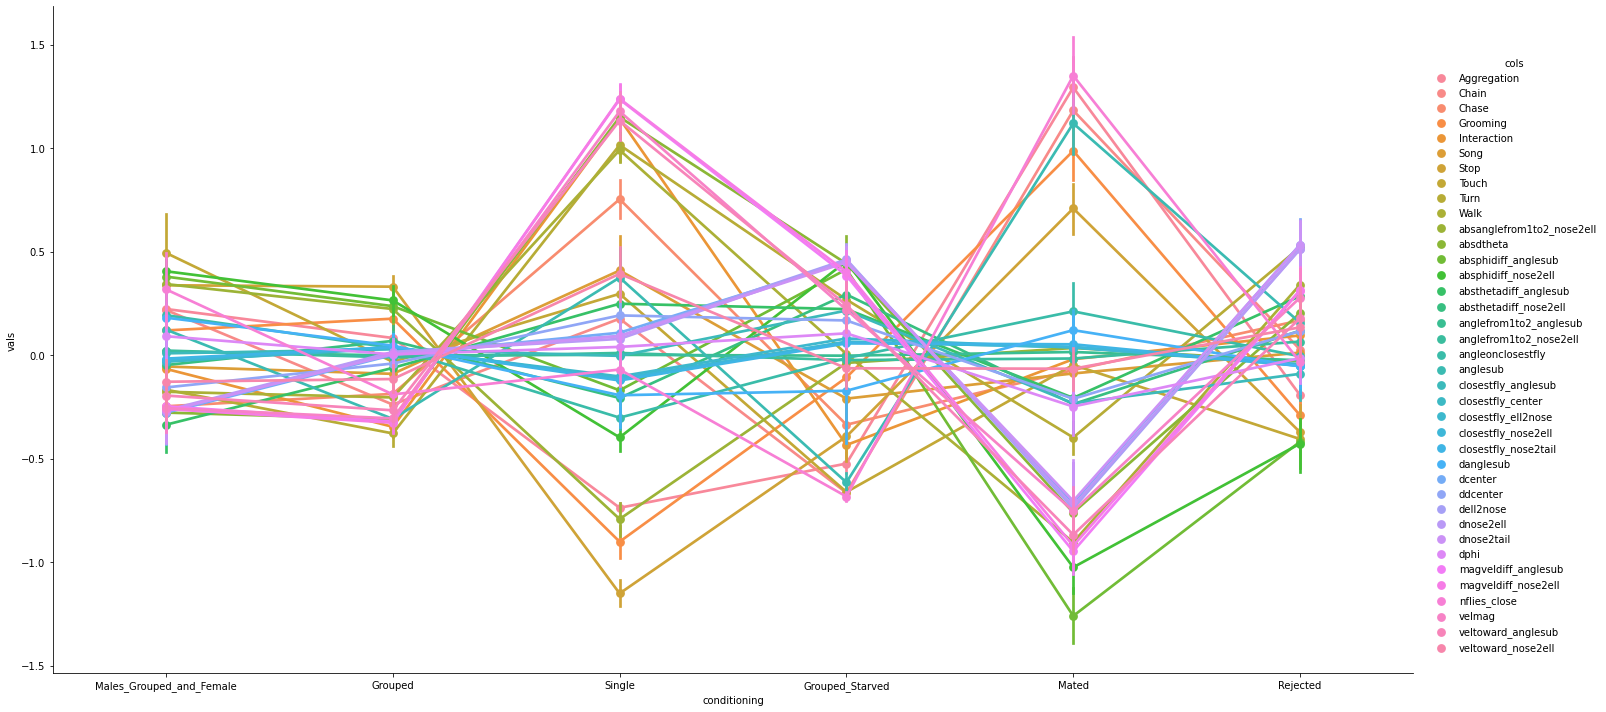

In [ ]:
# Comparing the differences bwtween features and conditions
dfm = flies.melt('conditioning', var_name = 'cols', value_name = 'vals')
g = sns.catplot(x = 'conditioning', y = 'vals', hue = 'cols', data = dfm, kind = 'point', aspect = 2, height = 10)

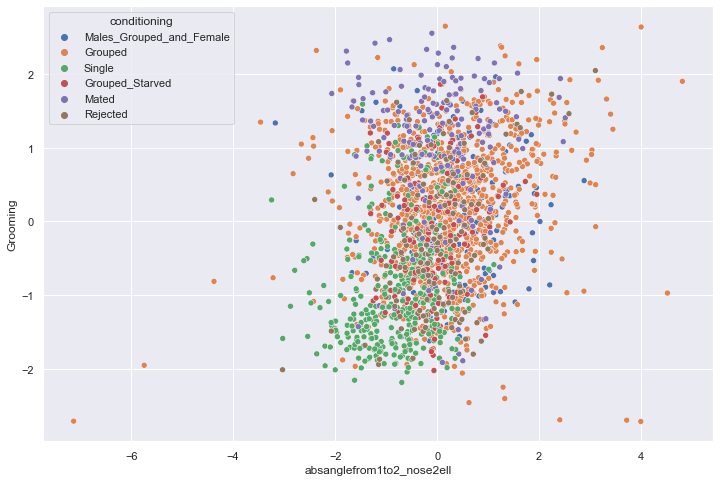

In [ ]:
#scatterplot of one feature against a behaivor comparing to all conditioning (needs to be done over all features/behaivors)
sns.set(rc = {"figure.figsize" : (12, 8)})
ax = sns.scatterplot(x = 'absanglefrom1to2_nose2ell', y = 'Grooming', hue = 'conditioning', data = flies).sizes = (1, 1)

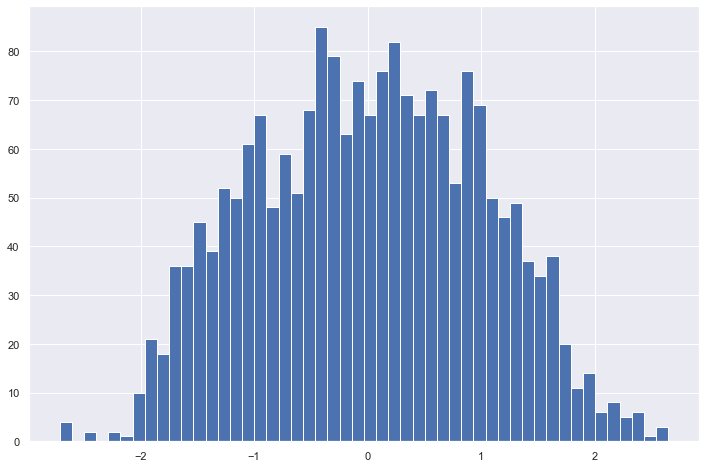

In [ ]:
flies.Grooming.hist(bins = 50);

In [ ]:
Features = [
"absanglefrom1to2_nose2ell",
"absdtheta",
"absphidiff_anglesub",
"absphidiff_nose2ell",
"absthetadiff_anglesub",
"absthetadiff_nose2ell",
"anglefrom1to2_anglesub",
"anglefrom1to2_nose2ell",
"angleonclosestfly",
"anglesub",
"closestfly_anglesub",
"closestfly_center",
"closestfly_ell2nose",
"closestfly_nose2ell",
"closestfly_nose2tail",
"danglesub",
"dcenter",
"ddcenter",
"dell2nose",
"dnose2ell",
"dnose2tail",
"dphi",
"magveldiff_anglesub",
"magveldiff_nose2ell",
"nflies_close",
"velmag",
"veltoward_anglesub",
"veltoward_nose2ell"]

<Figure size 2016x2016 with 0 Axes>

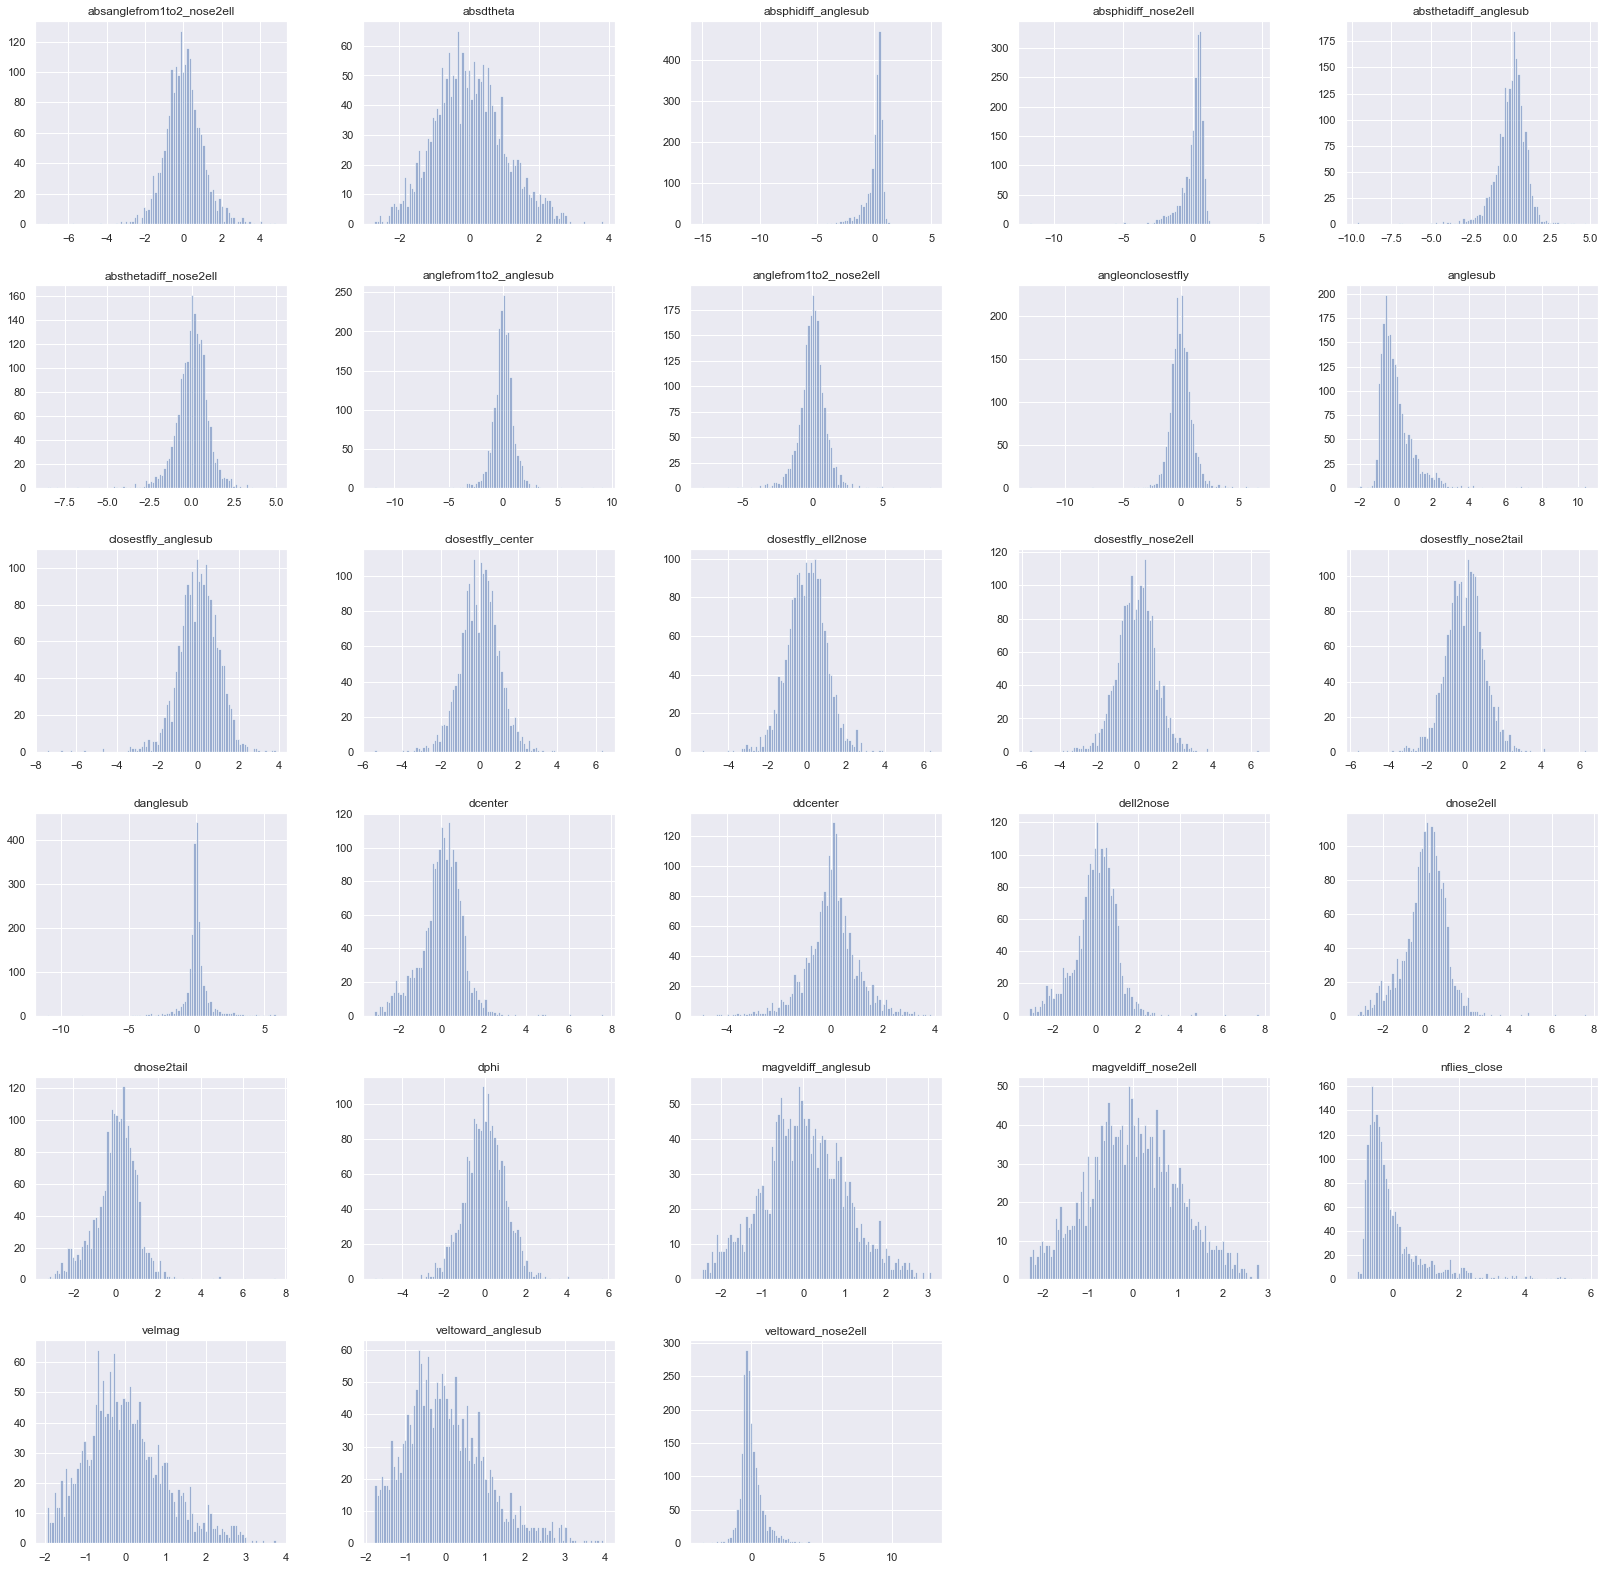

In [ ]:
#printing all the features histogram
plt.figure(figsize = (28, 28))
flies[Features].hist(figsize = (28, 28), bins = 100, alpha = 0.5, label = "Features")
flies.Grooming.hist(figsize = (28, 28), bins = 100, alpha = 0.5, label = "Grooming")
plt.xlabel("Features", size = 14)
plt.ylabel("Grooming", size = 14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc = 'upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python_2.png")

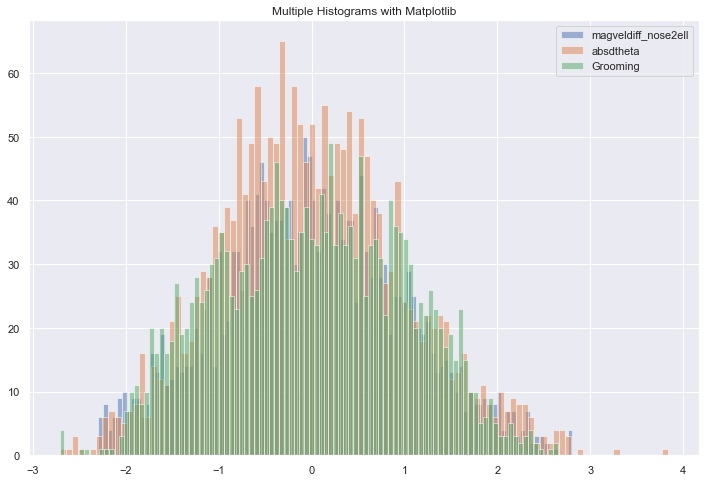

In [ ]:
#Multiple overlapping histogram -  to define corolations
plt.hist(flies.magveldiff_nose2ell, bins = 100, alpha = 0.5, label = "magveldiff_nose2ell")
plt.hist(flies.absdtheta, bins = 100, alpha = 0.5, label = "absdtheta")
plt.hist(flies.Grooming, bins = 100, alpha = 0.5, label = "Grooming")
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc = 'upper right')

In [ ]:
#boxploting two different features to grooming behavior
feature, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = flies['absdtheta'], y = flies['Grooming'], ax = axes[0])
sns.boxplot(x = flies['magveldiff_anglesub'], y = flies['Grooming'], ax = axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'absdtheta', ylabel = 'Grooming')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'magveldiff_anglesub', ylabel = 'Grooming');

In [ ]:
#boxploting the features by their values
axes = plt.subplots(1, figsize = (15, 5))
sns.set_style("whitegrid")
sns.boxplot(x = 'cols', y = 'vals', data = dfm)